In [100]:
#Importo los módulos de pandas y numpy.
import pandas as pd
import numpy as np
from numpy import random
#Importo el módulo para leer archivos Excel.
import xlrd
#Importo el módulo OS.
import os

def remove_nan(ls):
  res = []
  for i in ls:
    if not pd.isna(i):
      res.append(i)
  return res

In [101]:
#Monto el drive.
from google.colab import drive
drive.mount('/content/drive') 

#Copio la location de todos los files de Tigre que vamos a estar queriendo abrir y convertir eventualmente en un mega dataframe.
location = '/content/drive/My Drive/Covidata_team/df_final.csv' 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df = pd.read_csv(location)
df = df.rename(columns={'Observación': 'observacion'})

In [103]:
df

,Unnamed: 0,documento,FApertura,Clasificacion,Nacimiento,Ultimo Contacto,observacion
0,0,43087241.0,2021-05-08,0,2001-02-20,2020-12-17T00:00:00-0300,"Atiende gabriela salom (positivo, le dan el al..."
1,1,40762085.0,2021-04-16,0,1994-11-10,2021-04-27T00:00:00-0300,\nno se aisla del caso conf.
2,2,36553715.0,2021-04-22,1,1992-01-21,NaN,acompañante
3,3,42419804.0,2021-03-31,0,2000-02-23,2021-03-26T00:00:00-0300,Alta: 9/4 (Se aisla del vínculo). El trabajo l...
4,4,94451766.0,2021-03-23,0,1983-05-20,2021-04-15T00:00:00-0300,\nFUC: 15/4\nManzo miguel ángel el 10/04/2021 ...
...,...,...,...,...,...,...,...
289,1997,92543657.0,NaN,0,2021-05-21,2021-05-19T00:00:00-0300,FUC 19/5. La hija y su ex mujer dieron +. Ella...
290,2006,42908158.0,NaN,1,2021-05-21,2021-05-20T00:00:00-0300,"Atiende Angela, esposa de marcelo (+), madre d..."
291,2039,38006965.0,NaN,0,1994-04-26,2021-05-22T00:00:00-0300,FUC: 22/05. Son compañeres del trabajo de dani...
292,2050,33196065.0,NaN,0,1987-07-28,2021-05-27T00:00:00-0300,\n --- fecha de inicio de sintomas mal cargada


In [104]:
set(list(df["Clasificacion"]))

{0, 1}

In [105]:
df['resultado'] = df["Clasificacion"]

In [106]:
df["resultado"].value_counts()

0    177
1    117
Name: resultado, dtype: int64

In [107]:
obs = df.groupby(["resultado"])["observacion"]

In [108]:
obs.groups

{0: [0, 1, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 17, 19, 20, 24, 26, 27, 30, 31, 33, 35, 36, 38, 40, 41, 42, 44, 45, 48, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 119, 120, 124, 127, 128, 129, 130, 132, 135, 136, 137, 138, ...], 1: [2, 7, 8, 15, 16, 18, 21, 22, 23, 25, 28, 29, 32, 34, 37, 39, 43, 46, 47, 55, 56, 57, 63, 66, 67, 71, 87, 93, 94, 113, 116, 121, 122, 123, 125, 126, 131, 133, 134, 142, 145, 146, 151, 153, 154, 155, 156, 158, 159, 162, 163, 164, 165, 166, 167, 169, 170, 172, 173, 174, 175, 177, 181, 186, 187, 194, 196, 197, 199, 211, 212, 215, 217, 220, 223, 225, 226, 229, 230, 231, 232, 239, 244, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 262, 264, 266, 267, 268, 269, 271, ...]}

In [109]:
obs.groups[0]

Int64Index([  0,   1,   3,   4,   5,   6,   9,  10,  11,  12,
            ...
            252, 261, 263, 265, 270, 284, 287, 289, 291, 292],
           dtype='int64', length=177)

In [110]:
df_0 = df.iloc[obs.groups[0].tolist(),]
df_1 = df.iloc[obs.groups[1].tolist(),]
df_resultado = pd.concat([df_0,df_1])

In [111]:
obs = pd.DataFrame(obs)

In [112]:
res_0 = list(obs[1].loc[0])
res_1 = list(obs[1].loc[1])

In [113]:
print(len(res_0))
print(len(res_1))

177
117


In [114]:
res_0 = remove_nan(res_0)
res_1 = remove_nan(res_1)

In [115]:
print(len(res_0))
print(len(res_1))

177
117


In [116]:
res_1

['acompañante',
 'Tuvo fiebre pero se le pasó. Los sigue la prepaga',
 'La sigue la prepaga\nFecha del ultimo contacto:22/01/2021, hacer seguimiento hasta el dia 05/02/2021. ',
 '\n --- fecha de inicio de sintomas mal cargada ',
 '\nFUC: 16/4  - Se aíslan correctamente y tiene quién le haga las compras. Seguimiento hasta el 26/4',
 '\n --- fecha de inicio de sintomas mal cargada 30/12/2020',
 'Fecha del ultimo contacto:02/02/2021, hacer seguimiento hasta el 16/02/2021. ',
 'Orlando (+) internado desde 16/5 (por dificultad para respirar, por ahora está estable). En la casa vive también Axel 42351865 (+), está medicado para la bronquitis. Axel está aislado en su pieza ya desde el 7/5 porque tenía síntomas.     Gloria ya tuvo covid en enero. Gloria, Gonzalo y Milena sin síntomas.',
 '\n --- fecha de inicio de sintomas mal cargada ',
 '\n --- fecha de inicio de sintomas mal cargada ',
 '\n --- fecha de inicio de sintomas mal cargada ',
 'actualizar fecha ultimo contacto',
 '\nEl confirmado

In [117]:
resultados = pd.DataFrame(columns=("resultados","observacion"))

In [118]:
resultados.loc[0] = [0," ".join(res_0)]
resultados.loc[1] = [1," ".join(res_1)]

In [119]:
resultados

,resultados,observacion
0,0,"Atiende gabriela salom (positivo, le dan el al..."
1,1,acompañante Tuvo fiebre pero se le pasó. Los s...


In [120]:
import re       # libreria de expresiones regulares
import string   # libreria de cadena de caracteres

print(string.punctuation)
print(re.escape(string.punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [121]:
# Defino una funcion que recibe un texto y devuelve el mismo texto sin singnos,
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()                                              
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)                           
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) 
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)                              
    return text

# Defino una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)

# Dataframe que resulta de aplicarle a las columnas la funcion de limpieza
data_clean = pd.DataFrame(resultados.observacion.apply(round1))

In [122]:
data_clean

,observacion
0,atiende gabriela salom positivo le dan el al...
1,acompañante tuvo fiebre pero se le pasó los s...


In [123]:
# Hacemos una segunda vuelta de limpieza
def clean_text_round2(text):
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.observacion.apply(round2))
 

In [124]:
data_clean

,observacion
0,atiende gabriela salom positivo le dan el al...
1,acompañante tuvo fiebre pero se le pasó los s...


In [153]:
# Vamos a crear la matriz de documentos-terminos usando usando CountVectorizer, y excluiremos las stop words del espaniol
from sklearn.feature_extraction.text import CountVectorizer

# Cargamos del paquete nltk las stopwords del espaniol a la lista "lines"
import nltk
nltk.download('stopwords') # hay que descargar este modulo en particular
nltk.download("cess_esp")
lines = nltk.corpus.stopwords.words('spanish')
#lines.extend(["FUC","fecha","alta","inicio","de","el","mal","cargada","abuela","fuc","sintomas","atiende","madre","padre"])
lines.extend(["FUC","fecha","inicio","mal","cargada","fuc","sintomas","atiende","madre","padre","seguimiento","síntomas","positivo","alta"])

print(lines)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías'

In [154]:
# Inicializo el modelo excluyendo stopwords
cv = CountVectorizer(stop_words=lines)
# Ajustamos el modelo y lo aplicamos al texto de nuestro dataframe generando una matriz esparsa
data_cv = cv.fit_transform(data_clean.observacion)
# Nos creamos un dataframe transformando a densa la matriz generada recien que tiene como columnas las palabras (terminos) y como filas los documentos
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# Le asignamos los indices del dataframe anterior
data_dtm.index = data_clean.index

In [155]:
data_dtm

,abajo,abuela,accidente,aclarle,acompañante,acostada,actualizar,actualmente,adecuadamente,además,adicional,adolfina,adriana,adulto,agarró,agita,agitado,agustin,agustina,ahora,ailen,aisla,aislada,aisladas,aislado,aislados,aislamiento,aislan,aislando,aislandose,aislar,aislaron,aislarse,aisle,aislo,aisló,alberto,alcanza,alejandra,alejandro,...,unas,va,vacuna,vacunarse,valentina,valeria,valores,van,varias,veces,vecino,ver,verificar,veronica,vez,victor,victoria,viendo,viernes,vieron,vigano,vinculo,virus,visitar,vive,viven,volver,voz,vuelva,víctor,vínculo,vínculos,vómito,xq,yanina,yerno,zoe,zulma,ángel,único
0,1,1,1,0,0,1,3,1,0,2,4,1,2,2,0,1,0,0,0,1,1,5,8,2,3,6,11,17,2,2,1,1,1,0,1,2,2,2,0,0,...,2,2,1,1,4,3,1,2,1,2,1,6,1,0,4,1,0,1,2,0,1,8,1,0,4,3,5,1,0,1,4,0,0,0,1,0,2,1,1,1
1,0,0,0,1,1,0,2,0,1,2,5,0,0,0,1,0,1,1,2,5,1,3,1,0,6,1,10,15,1,0,2,3,2,1,2,0,0,0,3,1,...,0,3,2,0,0,3,0,0,0,0,0,2,0,2,0,0,1,0,2,2,0,3,0,1,3,1,2,0,1,0,0,1,1,1,0,1,0,0,0,0


In [156]:
sp_vocab = set(w.lower() for w in nltk.corpus.cess_esp.words())

In [157]:
ls = []
j = 0
for i in data_dtm.columns:
  if i in sp_vocab:
    ls.append(i)
len(ls)

439

In [158]:
data_filtrada = data_dtm[ls]

In [159]:
data_filtrada

,abajo,abuela,accidente,acompañante,actualmente,adecuadamente,además,adicional,ahora,aislado,aislamiento,aislar,aislarse,alberto,alcanza,alejandro,alvarez,amaneció,ambos,ambulancia,angel,anterior,antonia,aparece,apellido,apenas,arriba,asistencia,asistir,asistió,atender,aun,aunque,azul,aíslan,año,años,baja,bajo,base,...,teléfono,temperatura,terreno,tipo,todas,toma,tomada,tomando,tomografía,tos,trabaja,trabajar,trabajo,tratamiento,tres,turno,unas,va,valores,van,varias,veces,vecino,ver,verificar,vez,victoria,viendo,viernes,vieron,virus,visitar,vive,viven,volver,voz,vuelva,víctor,ángel,único
0,1,1,1,0,1,0,2,4,1,3,11,1,1,2,2,0,0,0,1,1,3,1,1,3,1,1,2,0,2,1,0,1,1,1,6,0,1,1,2,4,...,1,0,1,1,1,1,1,1,1,6,0,1,12,2,2,1,2,2,1,2,1,2,1,6,1,4,0,1,2,0,1,0,4,3,5,1,0,1,1,1
1,0,0,0,1,0,1,2,5,5,6,10,2,2,0,0,1,1,1,3,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,3,1,3,0,0,6,...,3,1,1,0,1,0,0,0,0,5,4,0,2,0,0,0,0,3,0,0,0,0,0,2,0,0,1,0,2,2,0,1,3,1,2,0,1,0,0,0


In [160]:
# Transponemos para tener una matriz de terminosXdocumentos
data = data_filtrada.transpose()

data.head()

,0,1
abajo,1,0
abuela,1,0
accidente,1,0
acompañante,0,1
actualmente,1,0


In [161]:
# Creo un diccionario
top_dict = {}

# Por cada año
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) # Ordeno las filas en forma decreciente y me quedo con las 30 palabras mas usadas
    top_dict[c]= list(zip(top.index, top.values))       # le asigno el año a la key del diccionario y como valor una tupla con la palabra y su frecuencia

print(top_dict)
print("\n")

# Imprimo las 15 palabras mas frecuentes por año
for anio, top_words in top_dict.items():
    print(anio) # imprimo la key
    print(', '.join([word for word, count in top_words[0:14]])) # imprimo las palabras en orden decreciente segun frecuencia y separadas con espacio y coma

{0: [('contacto', 29), ('negativo', 19), ('hacer', 17), ('dio', 17), ('día', 15), ('hija', 14), ('dolor', 13), ('casa', 13), ('resultado', 13), ('trabajo', 12), ('hijo', 12), ('si', 12), ('aislamiento', 11), ('esposa', 10), ('hace', 9), ('encuentra', 8), ('confirmada', 8), ('partir', 8), ('marido', 7), ('florencia', 7), ('domicilio', 7), ('garganta', 6), ('fiebre', 6), ('tos', 6), ('sospechosa', 6), ('aíslan', 6), ('presenta', 6), ('familia', 6), ('certificado', 6), ('hijos', 6)], 1: [('dolor', 15), ('hacer', 14), ('presenta', 12), ('contacto', 12), ('fiebre', 12), ('confirmada', 12), ('caso', 11), ('esposa', 10), ('aislamiento', 10), ('resultado', 9), ('hija', 9), ('cabeza', 9), ('marido', 7), ('dio', 6), ('esposo', 6), ('base', 6), ('aislado', 6), ('tos', 5), ('estrecho', 5), ('sospechosa', 5), ('casa', 5), ('ahora', 5), ('adicional', 5), ('situación', 5), ('si', 5), ('sigue', 5), ('trabaja', 4), ('llamados', 4), ('dijo', 4), ('garganta', 4)]}


0
contacto, negativo, hacer, dio, día,

Acá faltaría agregar más palabras que quiero filtrar.


In [162]:
data.columns

Int64Index([0, 1], dtype='int64')

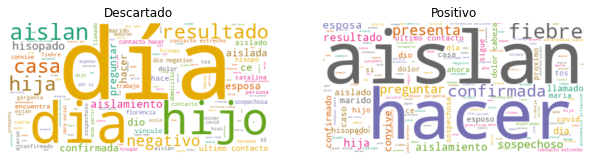

In [163]:
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
plt.rcParams['figure.figsize'] = [16,12] # tamanio de los plots
 
# Para cada categoría creo un WC
for index,resultado in enumerate(data.columns):
    wc.generate(data_clean.observacion[resultado])  
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title({0:"Descartado",1:"Positivo"}[index])
plt.show()

Hasta acá tenemos solo un análisis observacional de ambos sets de datos. Ahora, queremos entrenar un modelo para intentar predecir por medio de las observaciones si cada sospechoso resultó positivo o negativo.



In [164]:
cero_clean = res_0
uno_clean = res_1

for n,i in enumerate(res_0):
  cero_clean[n] = clean_text_round1(i)

for n,i in enumerate(res_1):
  uno_clean[n] = clean_text_round1(i)

for n,i in enumerate(cero_clean):
  cero_clean[n] = clean_text_round2(i)

for n,i in enumerate(uno_clean):
  uno_clean[n] = clean_text_round2(i)

In [165]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() # funcion para lematizar
nltk.download('stopwords') # hay que descargar este modulo en particular
sw = nltk.corpus.stopwords.words('spanish') # lista de stopwords
sw.extend(["FUC","fecha","inicio","mal","cargada","fuc","sintomas","atiende","madre","padre","seguimiento","síntomas","positivo"])

def lemma_remove_sw(text):
  words = text.split(' ') # separamos por espacios
  words_clean = []
  for w in words:
    if not w in sw: # si no es stopword, agregamos la version lematizada
      words_clean.append(lemmatizer.lemmatize(w))
  return ' '.join(words_clean)

def lemma(text):
  words = text.split(' ') # separamos por espacios
  words_clean = []
  for w in words:
      words_clean.append(lemmatizer.lemmatize(w))
  return ' '.join(words_clean)

data_cero_with_stopword = []
data_uno_with_stopword = []

for n,i in enumerate(cero_clean):
  cero_clean[n] = lemma_remove_sw(i)
  data_cero_with_stopword.append(lemma(i))

for n,i in enumerate(uno_clean):
  uno_clean[n] = lemma_remove_sw(i)
  data_uno_with_stopword.append(lemma(i))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
print(cero_clean[0:5])
print(data_cero_with_stopword[0:5])

['gabriela salom   dan alta    figura sistema   contacto permanente   alta    menciona médicos dieron alta ce deberían alta hoy  volver llamar lunes  ', ' aisla caso conf ', 'alta     aisla vínculo   trabajo mandó hacerse hisop  ver trabajo deje cumplir aislamiento aunque negativo ', '    manzo miguel ángel    presento  hisopo dio     martes     alta transcurrieron  diaz recomendados  además encuentra mejor solo presenta dolor espalda  recomendé pidiera alta epidemiológica hisopo   juana manso centro salud    mujer presento alta epidemiológica día viernes     dado presentar dieron positiva realizarle hisopado   además hijo  aprox alta epidemiológica   lado comenta aislaron manzo tomas ariel liz carolina rodas     ende alta día      ', 'alta         aislan ']
['gabriela salom   dan alta    figura sistema   contacto permanente   alta    menciona médicos dieron alta ce deberían alta hoy  volver llamar lunes  ', ' aisla caso conf ', 'alta     aisla vínculo   trabajo mandó hacerse hisop  ve

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

data = cero_clean + uno_clean # junto las dos listas
data_sw = data_cero_with_stopword + data_uno_with_stopword # idem para el caso con stopwords
label = np.array([0]*len(cero_clean) + [1]*len(uno_clean)) # armo el vector de etiquetas

counter = CountVectorizer(stop_words=None) # ahora armo el vectorizer. no uso la opcion de remover stopwords porque ya los removi en un paso anterior
allX = counter.fit_transform(data) # transformo 
allX_sw = counter.fit_transform(data_sw) # transformo


In [168]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds es un número típico si tenemos suficientes datos. Pedimos shuffle=True para que sea al azar la separación en subgrupos
skf.get_n_splits(allX, label) # arma los folds a partir de los datos

alpha_values = np.arange(1,100) # valores de alpha
auc_values = [] # aca es donde van a ir a parar los AUCs de cada fold para el caso sin stopwords
auc_values_sw = [] # aca es donde van a ir a parar los AUCs de cada fold para el caso con stopwords


# separo en ambos datasets
X, finalX, y, finaly= train_test_split(allX, label)
X_sw, finalX_sw, y_sw, finaly_sw = train_test_split(allX_sw, label)

In [169]:
y = np.array(y)
for alpha in alpha_values: # me muevo en alpha
  auc_temp = [] # aca guardo los auc de cada fold para luego promediar
  auc_temp_sw = [] # idem para caso con stopwords
  for train_index, test_index in skf.split(X, y): # va generando los indices que corresponden a train y test en cada fold
      X_train, X_test = X[train_index], X[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
      y_train, y_test = y[train_index], y[test_index]  # idem con los targets
      mnb = MultinomialNB(alpha=alpha) # armo el clasificador Naive Bayes
      mnb.fit(X_train, y_train) # entreno
      probas = mnb.predict_proba(X_test) # estimo probabilidades
      auc_temp.append(roc_auc_score(y_test, probas[:,1])) #  AUC con datos de evaluación
      ## repito para el caso con stopwords
      X_train, X_test = X_sw[train_index], X_sw[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
      y_train, y_test = y_sw[train_index], y_sw[test_index]  # idem con los targets
      mnb = MultinomialNB(alpha=alpha)
      mnb.fit(X_train, y_train)
      probas = mnb.predict_proba(X_test)
      auc_temp_sw.append(roc_auc_score(y_test, probas[:,1])) #  AUC con datos de evaluación
  auc_values.append(np.mean(auc_temp)) # asigno el promedio de los AUC
  auc_values_sw.append(np.mean(auc_temp_sw))  # asigno el promedio de los AUC

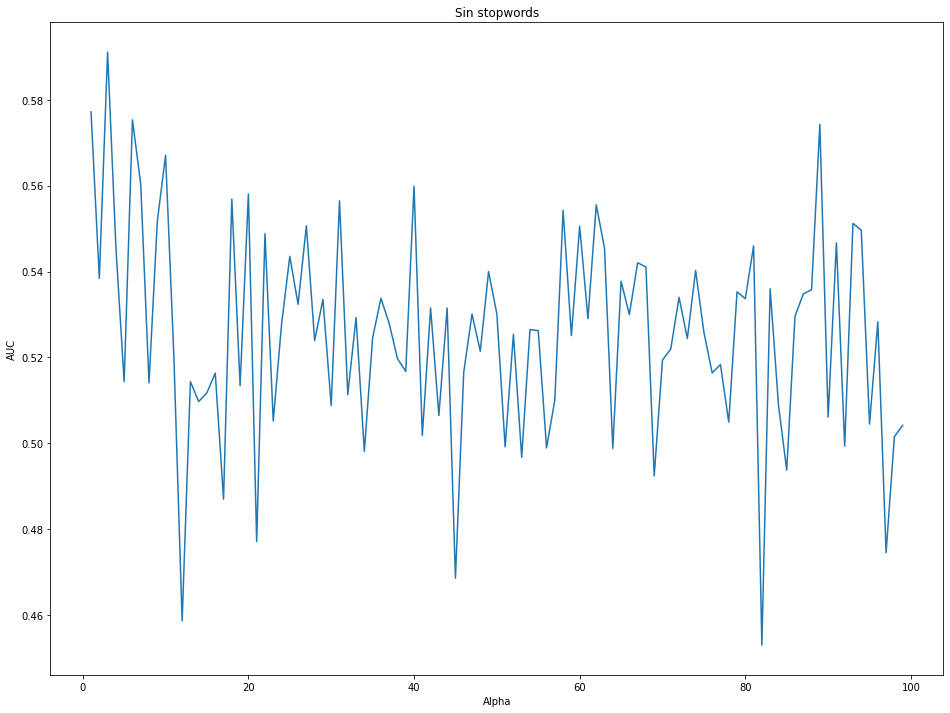

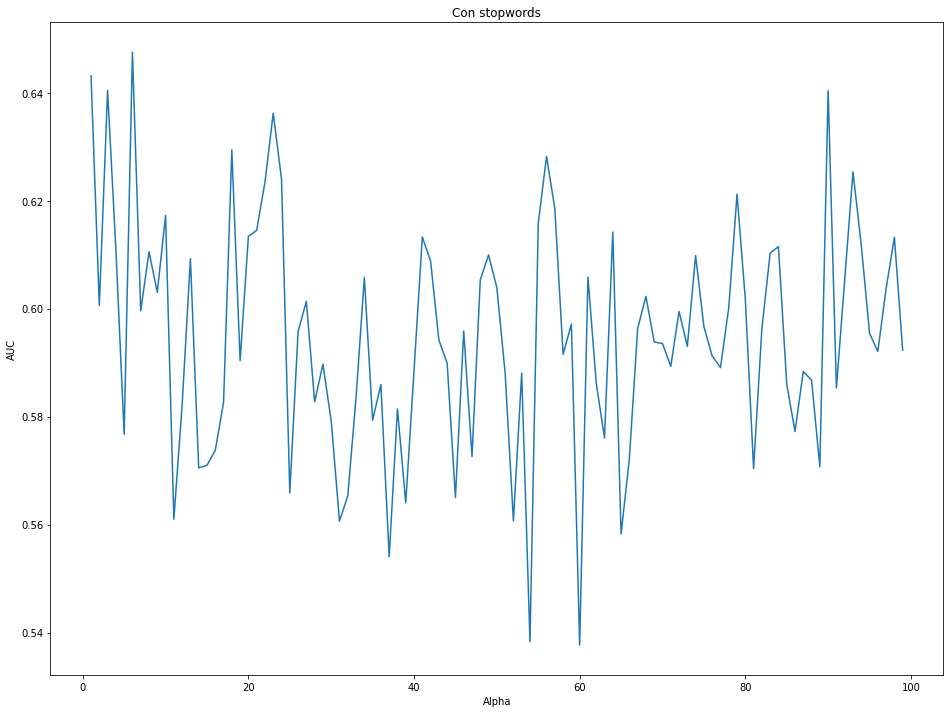

In [170]:
plt.figure()
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.title('Sin stopwords')
plt.plot(alpha_values, auc_values)
plt.figure()
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.title('Con stopwords')
plt.plot(alpha_values, auc_values_sw)

AUC: 0.7829
[[34  4]
 [22 14]]


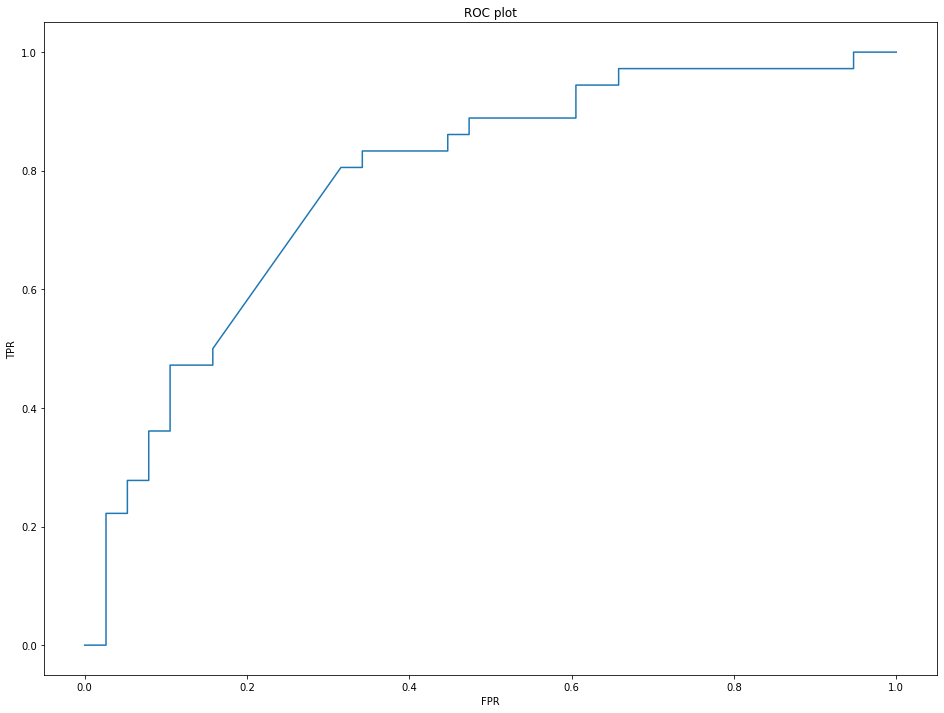

In [171]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
mnb = MultinomialNB(alpha=1)
mnb.fit(X, y)
probas = mnb.predict_proba(finalX)
fpr, tpr, thresholds = roc_curve(finaly, probas[:,1]) # para plotear curva ROC con datos de entrenamiento
plt.figure()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC plot')
plt.plot(fpr,tpr)
print('AUC: {}'.format(round(roc_auc_score(finaly, probas[:,1]),4)))  

print(confusion_matrix(finaly, mnb.predict(finalX)))

In [172]:


auc_values = [] # aca es donde van a ir a parar los AUCs de cada fold para el caso sin stopwords
for i in range(1,5000):
  skf = StratifiedKFold(n_splits=10, shuffle=True) # 5 folds es un número típico si tenemos suficientes datos. Pedimos shuffle=True para que sea al azar la separación en subgrupos
  skf.get_n_splits(allX_sw, label) # arma los folds a partir de los datos

  y = np.array(y)
  # separo en ambos datasets
  X, finalX, y, finaly= train_test_split(allX, label)

  auc_temp = [] # aca guardo los auc de cada fold para luego promediar
  auc_temp_sw = [] # idem para caso con stopwords
  for train_index, test_index in skf.split(X, y): # va generando los indices que corresponden a train y test en cada fold
      X_train, X_test = X[train_index], X[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
      y_train, y_test = y[train_index], y[test_index]  # idem con los targets
      mnb = MultinomialNB(alpha=1) # armo el clasificador Naive Bayes
      mnb.fit(X_train, y_train) # entreno
      probas = mnb.predict_proba(X_test) # estimo probabilidades
      auc_temp.append(roc_auc_score(y_test, probas[:,1])) #  AUC con datos de evaluación
  auc_values.append(np.mean(auc_temp)) # asigno el promedio de los AUC
print(np.mean(auc_values))



0.651557441617033


In [173]:
len(label)

294

MODELO


In [174]:
X_train = allX
y_train = label
mnb = MultinomialNB(alpha=1) # armo el clasificador Naive Bayes
mnb.fit(X_train, y_train) # entreno
probas = mnb.predict_proba(X_train) # estimo probabilidades


In [175]:
df = pd.DataFrame(probas)

In [176]:
len(df)

294

In [177]:
df

,0,1
0,0.999997,2.876705e-06
1,0.261339,7.386612e-01
2,0.999917,8.287134e-05
3,1.000000,3.602129e-14
4,0.767241,2.327590e-01
...,...,...
289,0.015046,9.849543e-01
290,0.020799,9.792007e-01
291,0.289202,7.107979e-01
292,0.041631,9.583685e-01


In [178]:
df_resultado["Probabilidad"] = df[1]

In [179]:
df_resultado

,Unnamed: 0,documento,FApertura,Clasificacion,Nacimiento,Ultimo Contacto,observacion,resultado,Probabilidad
0,0,43087241.0,2021-05-08,0,2001-02-20,2020-12-17T00:00:00-0300,"Atiende gabriela salom (positivo, le dan el al...",0,2.876705e-06
1,1,40762085.0,2021-04-16,0,1994-11-10,2021-04-27T00:00:00-0300,\nno se aisla del caso conf.,0,7.386612e-01
3,3,42419804.0,2021-03-31,0,2000-02-23,2021-03-26T00:00:00-0300,Alta: 9/4 (Se aisla del vínculo). El trabajo l...,0,3.602129e-14
4,4,94451766.0,2021-03-23,0,1983-05-20,2021-04-15T00:00:00-0300,\nFUC: 15/4\nManzo miguel ángel el 10/04/2021 ...,0,2.327590e-01
5,5,45989801.0,2021-03-24,0,2004-06-30,2021-04-06T00:00:00-0300,"Alta: 20/4 (FUC: 6/4, se aislan)",0,3.979592e-01
...,...,...,...,...,...,...,...,...,...
285,1873,43400213.0,NaN,1,2001-05-11,2021-05-13T00:00:00-0300,Nieto de la positiva. Di indicamientos de aisl...,1,8.402420e-01
286,1875,11000154.0,NaN,1,1953-07-23,2021-05-13T00:00:00-0300,Esposo de la confirmada. Di indicaciones del a...,1,9.976547e-01
288,1921,35423506.0,NaN,1,2021-05-01,2021-05-18T00:00:00-0300,actualizar fecha de nacimiento\npedir DNI\n,1,9.999837e-01
290,2006,42908158.0,NaN,1,2021-05-21,2021-05-20T00:00:00-0300,"Atiende Angela, esposa de marcelo (+), madre d...",1,9.792007e-01


In [180]:
df_resultado.to_csv("/content/drive/My Drive/Covidata_team/df_resultado.csv")